In [1]:
import utils as ut
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from dataunderstanding import correlations

In [2]:
cyclist = pd.read_csv('dataset/cyclists_cleaned.csv')

In [3]:
# Take the births year of the cyclists, filtering the null values
births = cyclist['birth_year'].dropna().values
#
births = births.reshape(-1, 1)

100%|██████████| 9/9 [00:00<00:00, 222.97it/s]


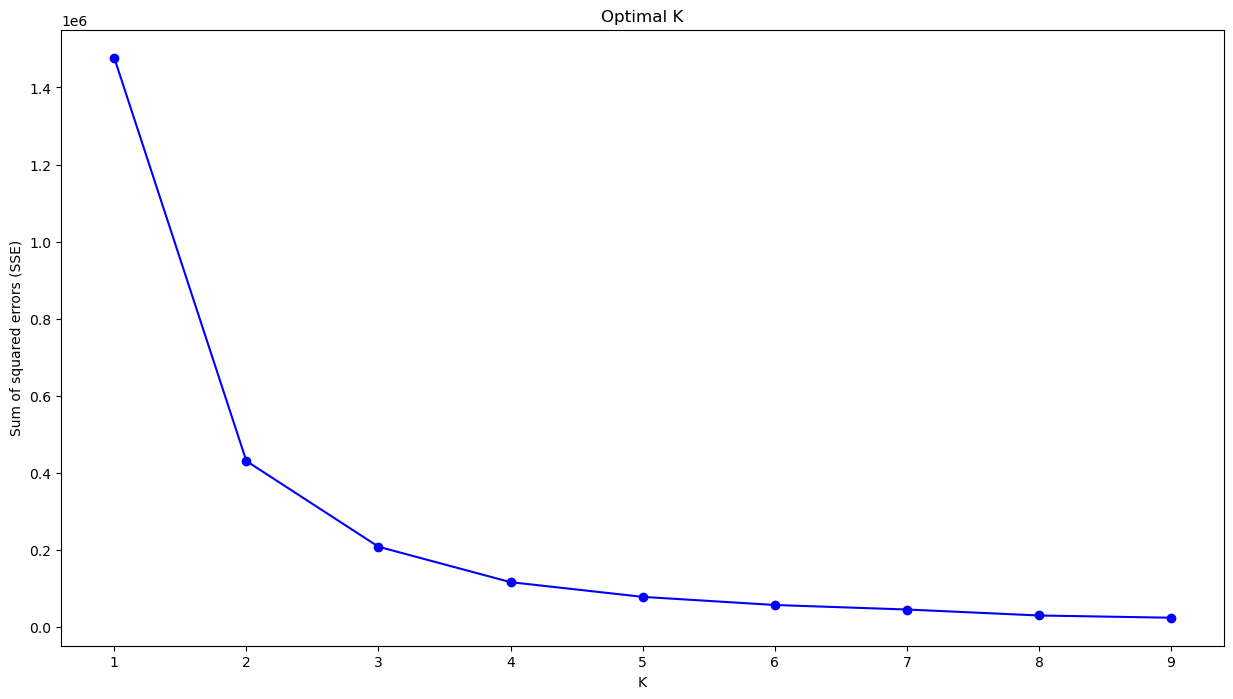

In [4]:
sse = []
K_range = range(1, 10)
for K in tqdm(K_range):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(births)
    sse.append(kmeans.inertia_)

# Plot the curve for the optimal value of K
plt.figure(figsize=(15, 8))
plt.plot(K_range, sse, 'bo-')
plt.title('Optimal K')
plt.xlabel('K')
plt.ylabel('Sum of squared errors (SSE)')
plt.show()

In [7]:
K = 2
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(births)
kmeans_labels = kmeans.labels_